# Facial-Emotion-Recogntion-HCL

In [1]:
!sudo apt-get install -y libgl1 libglib2.0-0
!pip uninstall torch torchvision -y
!pip install -r requirements/requirements-normal.txt
!pip install -r requirements/requirements-pytorch.txt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libelf1 libgl1-amber-dri libgl1-mesa-dri libglapi-mesa
  libglib2.0-data libglvnd0 libglx-mesa0 libglx0 libllvm15 libpciaccess0
  libsensors-config libsensors5 libx11-6 libx11-data libx11-xcb1 libxau6
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0
  libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcb1 libxdmcp6 libxext6
  libxfixes3 libxshmfence1 libxxf86vm1 shared-mime-info xdg-user-dirs
Suggested packages:
  pciutils lm-sensors
The following NEW packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libelf1 libgl1 libgl1-amber-dri libgl1-mesa-dri libglapi-mesa
  libglib2.0-0 libglib2.0-data libglvnd0 libglx-mesa0 libglx0 libllvm15
  libpciaccess0 libsensors-config libsensors

In [2]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

## Environment

### System

- Os: Windows 11 64bit
- Python: 3.11.9

### Package

- pytorch: cu126 
- ipykernel: 6.29.5
- pandas: 2.2.2
- Pillow: 10.3.0
- tqdm: 4.66.4
- opencv-python: 4.11.0
- albumentations: 2.06

### Import libraries

In [3]:
import torch
import gc

import scripts.augment as sa
import scripts.preprocessing as sp
import scripts.evaluate as ev
import scripts.model as md
import scripts.backbone as b

2025-05-23 03:50:07.086263: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-23 03:50:07.275840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747972207.302815    1368 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747972207.314511    1368 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 03:50:07.517095: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Define constant

In [4]:
# === Define paths ===
affectnet_raw_path = "./data/affectnet/" 
processed_root_path = "./data/processed/"  
processed_metadata_csv = "./data/processed/train.csv"  
augmented_root_path = "./data/augmented/"  
augmented_metadata_csv = "./data/augmented/train.csv"  

# === Define preprocessing & augmentation parameters ===
img_size = (224, 224)   
rename_images = True   
dry_run = False       
augment_target_per_class = 8000    
augment_severity = "medium"        

### Data preprocessing

In [ ]:
# Preprocess affectnet data
processed_affectnet = sp.process_affectnet(
    affectnet_root=affectnet_raw_path,
    processed_root=processed_root_path,
    img_size=img_size,
    rename=rename_images,
    rename_width=5,
    dry_run=dry_run
)

### Data augmentation

In [ ]:
# Augment affectnet training split
augmented_affectnet = sa.augment_affectnet(
    processed_root=processed_root_path,
    aug_root=augmented_root_path,
    target=augment_target_per_class,
    severity=augment_severity
)

### Model training and evaluate

[✓] Train: 44800 | Val: 9600 | Test: 9600

=== Training pipeline for timm/vit_small_patch16_224.augreg_in21k ===
[INFO] Loading classification and base vision models: timm/vit_small_patch16_224.augreg_in21k on cuda
Fine-tuning timm/vit_small_patch16_224.augreg_in21k...
[INFO] Fine-tuning 3,552,008/21,668,744 params (16.39%)


Epoch 1/20: 100%|██████████| 700/700 [02:52<00:00,  4.05it/s]


Epoch 1: Train 1.8363, Val 1.6042, Acc 0.3917


Epoch 2/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 2: Train 1.5787, Val 1.5104, Acc 0.4248


Epoch 3/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 3: Train 1.5170, Val 1.4590, Acc 0.4497


Epoch 4/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 4: Train 1.4731, Val 1.4318, Acc 0.4618


Epoch 5/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 5: Train 1.4372, Val 1.3963, Acc 0.4764


Epoch 6/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 6: Train 1.4048, Val 1.3749, Acc 0.4835


Epoch 7/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 7: Train 1.3834, Val 1.3537, Acc 0.4988


Epoch 8/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 8: Train 1.3660, Val 1.3525, Acc 0.4982


Epoch 9/20: 100%|██████████| 700/700 [02:54<00:00,  4.02it/s]


Epoch 9: Train 1.3433, Val 1.3350, Acc 0.5069


Epoch 10/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 10: Train 1.3250, Val 1.3188, Acc 0.5172


Epoch 11/20: 100%|██████████| 700/700 [02:53<00:00,  4.02it/s]


Epoch 11: Train 1.3174, Val 1.3149, Acc 0.5145


Epoch 12/20: 100%|██████████| 700/700 [02:53<00:00,  4.02it/s]


Epoch 12: Train 1.3043, Val 1.3063, Acc 0.5155


Epoch 13/20: 100%|██████████| 700/700 [02:53<00:00,  4.02it/s]


Epoch 13: Train 1.2924, Val 1.3007, Acc 0.5210


Epoch 14/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 14: Train 1.2842, Val 1.2951, Acc 0.5235


Epoch 15/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 15: Train 1.2801, Val 1.2898, Acc 0.5260


Epoch 16/20: 100%|██████████| 700/700 [02:54<00:00,  4.02it/s]


Epoch 16: Train 1.2793, Val 1.2900, Acc 0.5224


Epoch 17/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 17: Train 1.2742, Val 1.2885, Acc 0.5271


Epoch 18/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 18: Train 1.2731, Val 1.2883, Acc 0.5258


Epoch 19/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 19: Train 1.2714, Val 1.2873, Acc 0.5267


Epoch 20/20: 100%|██████████| 700/700 [02:53<00:00,  4.03it/s]


Epoch 20: Train 1.2727, Val 1.2872, Acc 0.5266
Training hybrid model for timm/vit_small_patch16_224.augreg_in21k...
[INFO] Extracting features for train set
[INFO] Extracting features for val set
[INFO] Training LightGBM classifier with 44800 samples
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	train's multi_logloss: 1.04463	valid's multi_logloss: 1.3423
[INFO] Training completed in 39.95 seconds
Evaluating hybrid model for timm/vit_small_patch16_224.augreg_in21k...
[INFO] Extracting test features


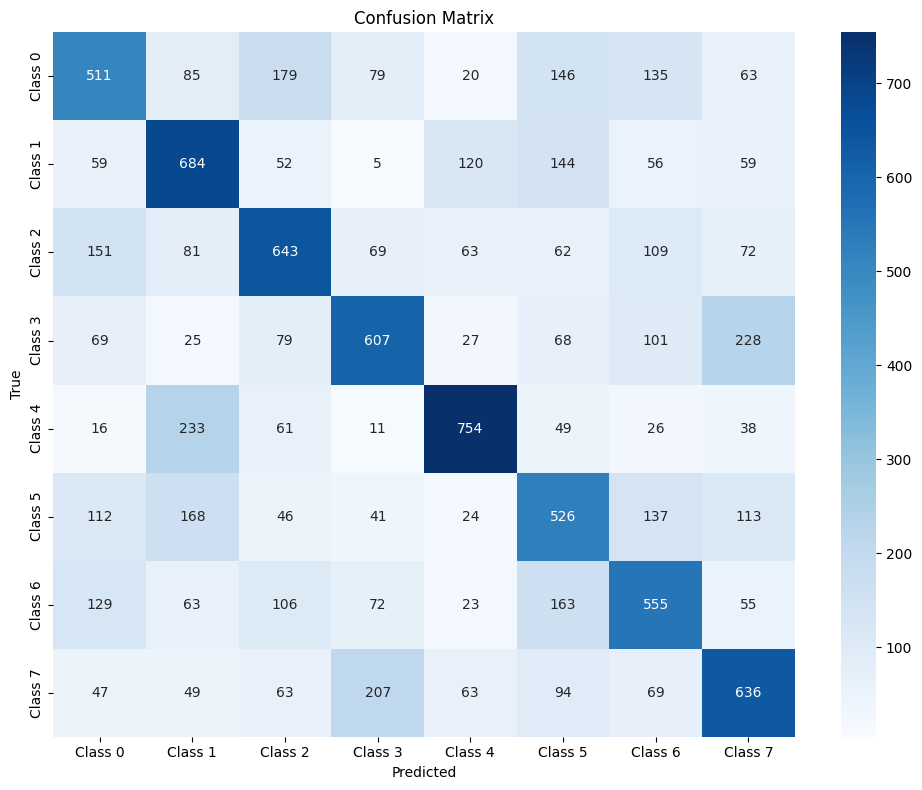

[INFO] Fine-tuned model saved to models/timm_vit_small_patch16_224.augreg_in21k/deit_model
[INFO] Model saved to models/timm_vit_small_patch16_224.augreg_in21k
Saved model to models/timm_vit_small_patch16_224.augreg_in21k

=== Training pipeline for google/vit-base-patch16-224 ===
[INFO] Loading classification and base vision models: google/vit-base-patch16-224 on cuda


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fine-tuning google/vit-base-patch16-224...
[INFO] Fine-tuning 14,181,896/85,804,808 params (16.53%)


Epoch 1/20: 100%|██████████| 700/700 [09:32<00:00,  1.22it/s]


Epoch 1: Train 1.7440, Val 1.5227, Acc 0.4173


Epoch 2/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 2: Train 1.5076, Val 1.4233, Acc 0.4591


Epoch 3/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 3: Train 1.4324, Val 1.3758, Acc 0.4795


Epoch 4/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 4: Train 1.3769, Val 1.3293, Acc 0.4995


Epoch 5/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 5: Train 1.3407, Val 1.2968, Acc 0.5142


Epoch 6/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 6: Train 1.3106, Val 1.2732, Acc 0.5204


Epoch 7/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 7: Train 1.2855, Val 1.2561, Acc 0.5284


Epoch 8/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 8: Train 1.2609, Val 1.2444, Acc 0.5332


Epoch 9/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 9: Train 1.2411, Val 1.2277, Acc 0.5393


Epoch 10/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 10: Train 1.2228, Val 1.2148, Acc 0.5466


Epoch 11/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 11: Train 1.2076, Val 1.2061, Acc 0.5499


Epoch 12/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 12: Train 1.1906, Val 1.2000, Acc 0.5486


Epoch 13/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 13: Train 1.1845, Val 1.1956, Acc 0.5530


Epoch 14/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 14: Train 1.1779, Val 1.1899, Acc 0.5539


Epoch 15/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 15: Train 1.1710, Val 1.1875, Acc 0.5581


Epoch 16/20: 100%|██████████| 700/700 [09:32<00:00,  1.22it/s]


Epoch 16: Train 1.1622, Val 1.1864, Acc 0.5581


Epoch 17/20: 100%|██████████| 700/700 [09:32<00:00,  1.22it/s]


Epoch 17: Train 1.1633, Val 1.1834, Acc 0.5596


Epoch 18/20: 100%|██████████| 700/700 [09:32<00:00,  1.22it/s]


Epoch 18: Train 1.1591, Val 1.1829, Acc 0.5596


Epoch 19/20: 100%|██████████| 700/700 [09:33<00:00,  1.22it/s]


Epoch 19: Train 1.1514, Val 1.1830, Acc 0.5599


Epoch 20/20: 100%|██████████| 700/700 [09:32<00:00,  1.22it/s]


Epoch 20: Train 1.1606, Val 1.1829, Acc 0.5602
Training hybrid model for google/vit-base-patch16-224...
[INFO] Extracting features for train set
[INFO] Extracting features for val set
[INFO] Training LightGBM classifier with 44800 samples
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	train's multi_logloss: 0.908393	valid's multi_logloss: 1.23524
[INFO] Training completed in 82.20 seconds
Evaluating hybrid model for google/vit-base-patch16-224...
[INFO] Extracting test features


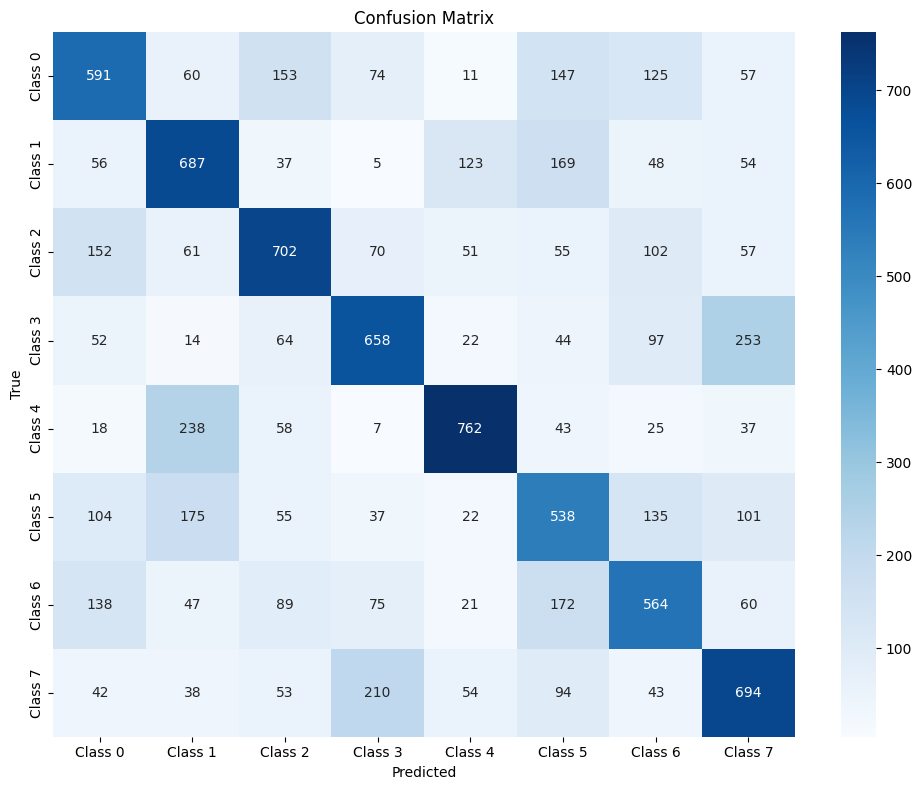

[INFO] Fine-tuned model saved to models/google_vit-base-patch16-224/deit_model
[INFO] Model saved to models/google_vit-base-patch16-224
Saved model to models/google_vit-base-patch16-224
All models trained and saved successfully.


In [7]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

model_configs = [
    ("timm/vit_small_patch16_224.augreg_in21k", 20),
    ("google/vit-base-patch16-224", 20),
]

# Load data once
data_loaders = ev.load_affectnet_data(augmented_metadata_csv)
train_loader = data_loaders['train_loader']
val_loader = data_loaders['val_loader']
test_loader = data_loaders['test_loader']

# Iterate and train each backbone + hybrid classifier
for model_name, epochs in model_configs:
    print(f"\n=== Training pipeline for {model_name} ===")
    # 1. Instantiate and fine-tune backbone
    backbone = b.VisionFeatureExtractor(model_name=model_name, device=device)
    print(f"Fine-tuning {model_name}...")

    backbone.finetune(
        train_loader,
        val_loader,
        num_classes=8,
        epochs=epochs,
        learning_rate=2e-5,
        weight_decay=0.01
    )

    # Clear unused memory to prevent OOM
    del backbone.classification_model
    torch.cuda.empty_cache()
    gc.collect()

    # 2. Train hybrid classifier
    classifier = md.LightGBMClassifier()
    hybrid_model = md.HybridEmotionClassifier(backbone, classifier)
    print(f"Training hybrid model for {model_name}...")
    hybrid_model.train(train_loader, val_loader)

    # 3. Evaluate on test set
    print(f"Evaluating hybrid model for {model_name}...")
    hybrid_model.evaluate(test_loader)

    # 4. Save and cleanup
    save_path = f"models/{model_name.replace('/', '_')}"
    hybrid_model.save(save_path)
    print(f"Saved model to {save_path}")

    # Cleanup GPU memory
    del backbone
    del hybrid_model
    torch.cuda.empty_cache()
    gc.collect()

print("All models trained and saved successfully.")